# Week4 Assignment - Submit a link to a GitHub repo where you have made 6 different plots using at least 2 plotting packages.

Step 1 : Getting list of largest companies in the United States by revenue  data from wikipedia weblink

Extracting data from HTML files using BeautifulSoup (Python library used for web scraping)

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

# view html file
# print(soup.prettify())

In [5]:
# Identify the corresponding data table in the html file and assign it to the variable
table = soup.find_all('table')[0]
# or table = soup.find('table', class_='wikitable sortable')
# print(table)

In [6]:
# Getting the table header details
world_titles = table.find_all('th')
#print(world_titles)

In [7]:
# Getting the table header data
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


Step 2: Creating the dataframe

In [8]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [9]:
# Getting all the table row details
column_data = table.find_all('tr')
# print(column_data)

In [10]:
# Getting each row data from the table
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
# df


In [11]:
# To show all rows regardless of count
pd.set_option('display.max_rows', None)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


# To visualize the data you provided using Python with pandas, matplotlib, seaborn, and plotly

Step 3: If needed, Data Preprocessing:
Example:
Convert the relevant columns into numeric types where necessary.
Handle any missing or special data (like percentages) appropriately.

In [12]:
# Convert the 'Revenue (USD millions)' column to numeric (removing commas)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace(',', '', regex=True).astype(float)
# df

In [13]:
# Take top 10 by revenue
top10 = df.sort_values('Revenue (USD millions)', ascending=False).head(10)
top10

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,357776.0,10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,344582.0,-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,307394.0,8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,276711.0,4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,262173.0,9.9%,"44,000","Conshohocken, Pennsylvania"


# 1. Bar plot

 pandas plot - Bar plot for Top 10 companies by Revenue

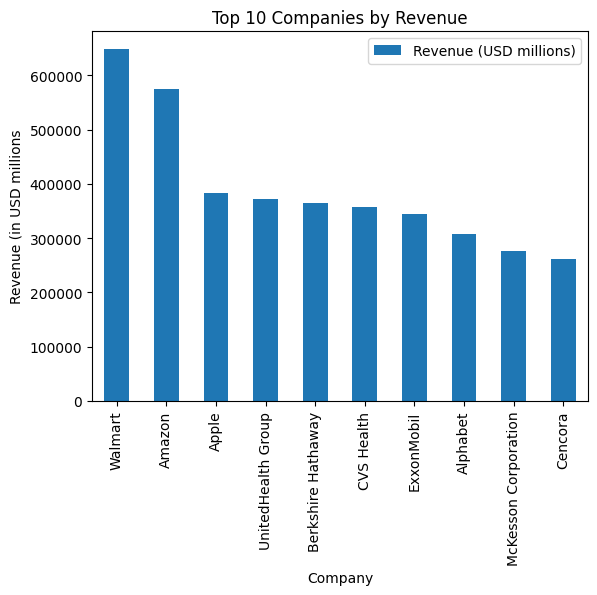

In [14]:
pandas_plot = top10.plot(kind='bar', x='Name', y='Revenue (USD millions)', title='Top 10 Companies by Revenue');
pandas_plot.set_xlabel('Company');
pandas_plot.set_ylabel('Revenue (in USD millions');

Visualization Using Matplotlib: generate a bar plot of revenue


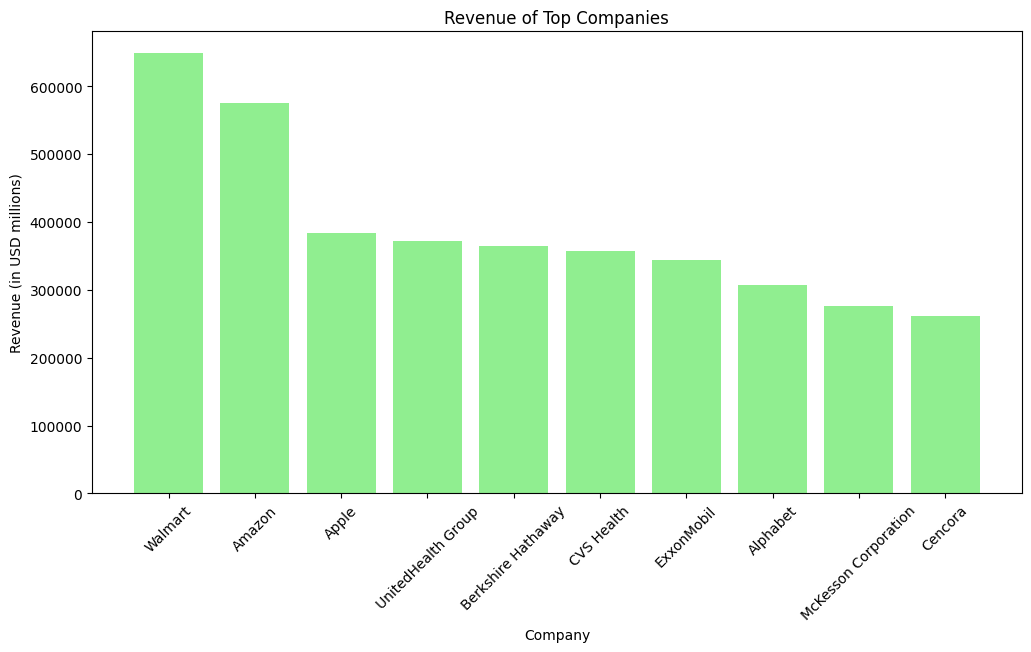

In [15]:
import matplotlib.pyplot as plt

# Plotting Revenue vs Company
plt.figure(figsize=(12, 6))
plt.bar(top10['Name'], top10['Revenue (USD millions)'], color='lightgreen')
plt.title('Revenue of Top Companies')
plt.xlabel('Company')
plt.ylabel('Revenue (in USD millions)')
plt.xticks(rotation=45)
plt.show()


Visualization Using Seaborn:
Seaborn is great for more complex plots, like box plots or heatmaps.

Example for Revenue Growth:

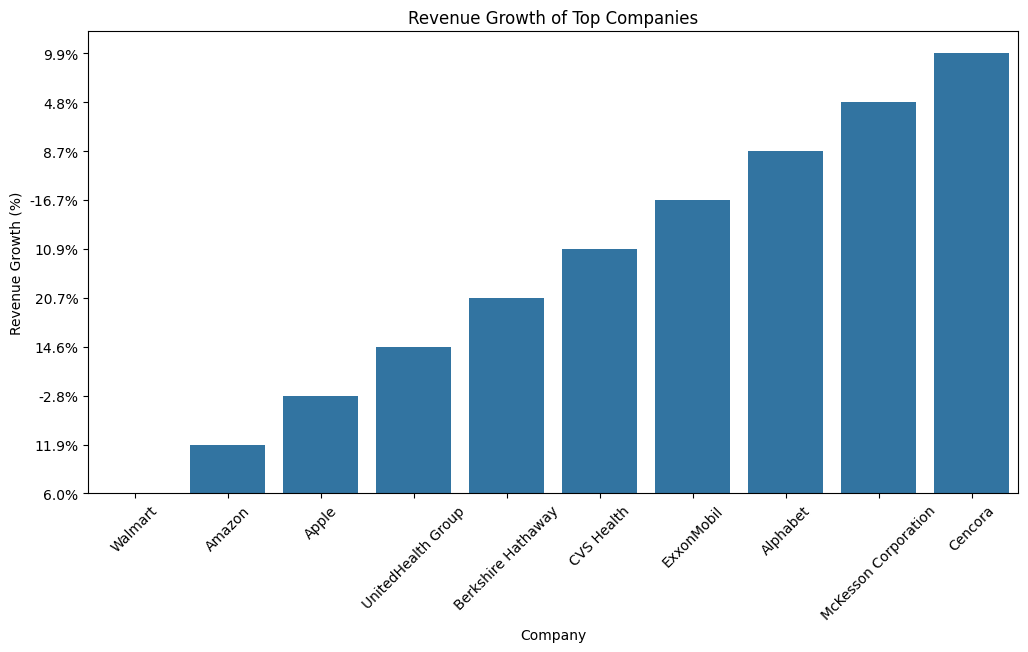

In [16]:
import seaborn as sns

# Convert Revenue Growth to numeric, stripping '%' and converting to float
df['Revenue growth'] = df['Revenue growth'].replace({'%': ''}, regex=True).astype(float)

plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Revenue growth', data=top10)
plt.xticks(rotation=45)
plt.title('Revenue Growth of Top Companies')
plt.xlabel('Company')
plt.ylabel('Revenue Growth (%)')
plt.gca().invert_yaxis()  # Only use if you *intentionally* want reverse order
plt.show()


# 2. Line Plot

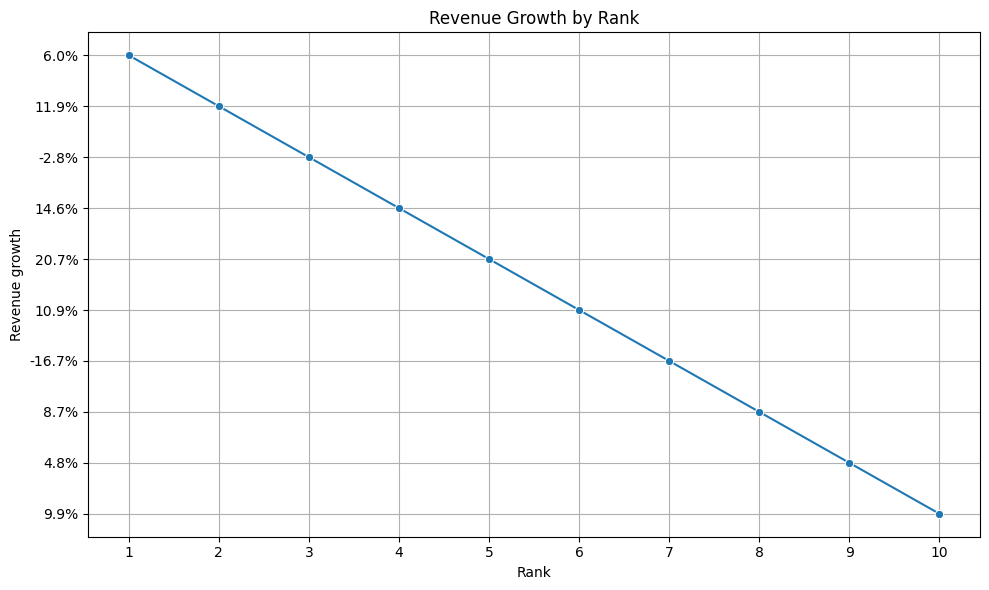

In [17]:

plt.figure(figsize=(10,6))
sns.lineplot(data=top10, x='Rank', y='Revenue growth', marker='o')
plt.title('Revenue Growth by Rank')
plt.xlabel('Rank')
plt.ylabel('Revenue growth')
plt.grid(True)
plt.tight_layout()
plt.show()

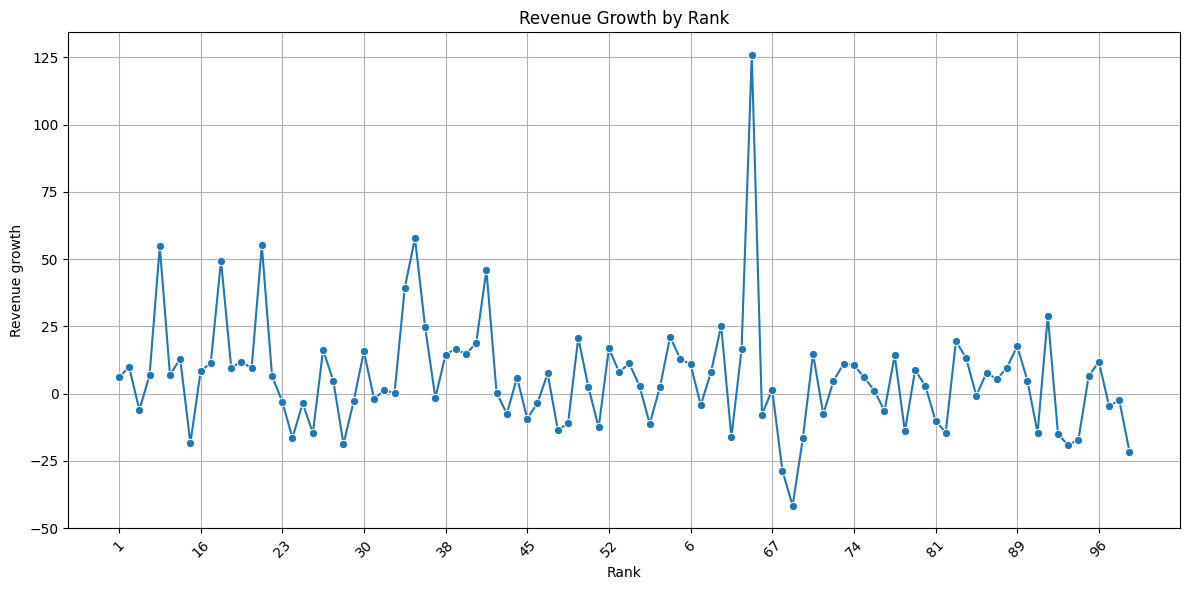

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Sort and plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.sort_values('Rank'), x='Rank', y='Revenue growth', marker='o')

plt.title('Revenue Growth by Rank')
plt.xlabel('Rank')
plt.ylabel('Revenue growth')

# Format x-axis:
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15, integer=True))  # Reduce number of ticks
plt.xticks(rotation=45)  # Rotate if still overlapping

plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Pie Chart for Industry Breakdown: To visualize the distribution of industries:

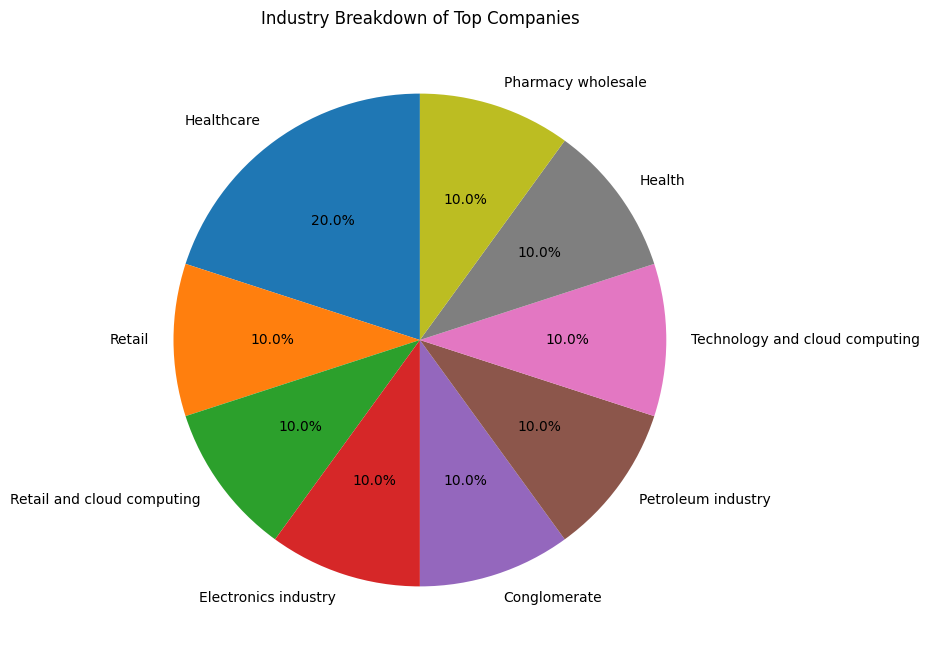

In [19]:
# Plotting Industry Breakdown with Pie Chart
industry_counts = top10['Industry'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Industry Breakdown of Top Companies')
plt.show()


# 4.Histogram for Revenue:

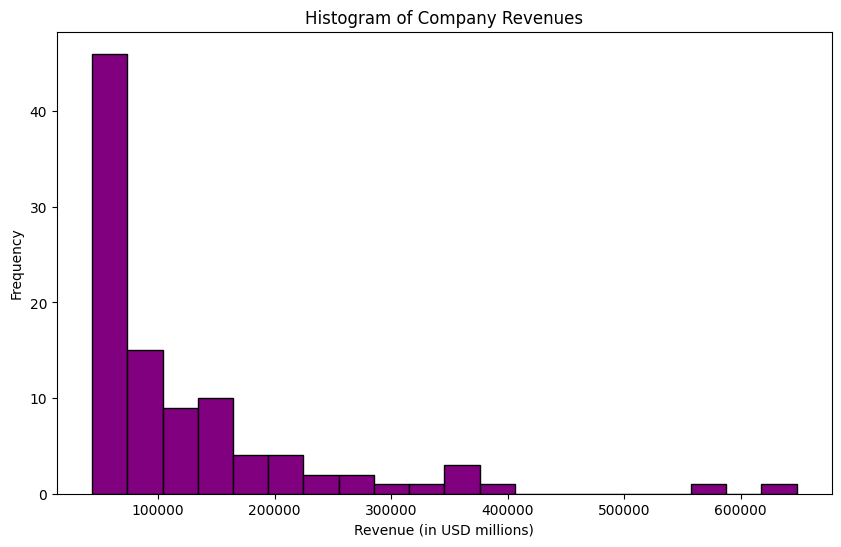

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Revenue (USD millions)'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Company Revenues')
plt.xlabel('Revenue (in USD millions)')
plt.ylabel('Frequency')
plt.show()

# 5. Box Plot – Revenue Growth by Industry (Seaborn)
To check for outliers and the spread of the revenue growth data

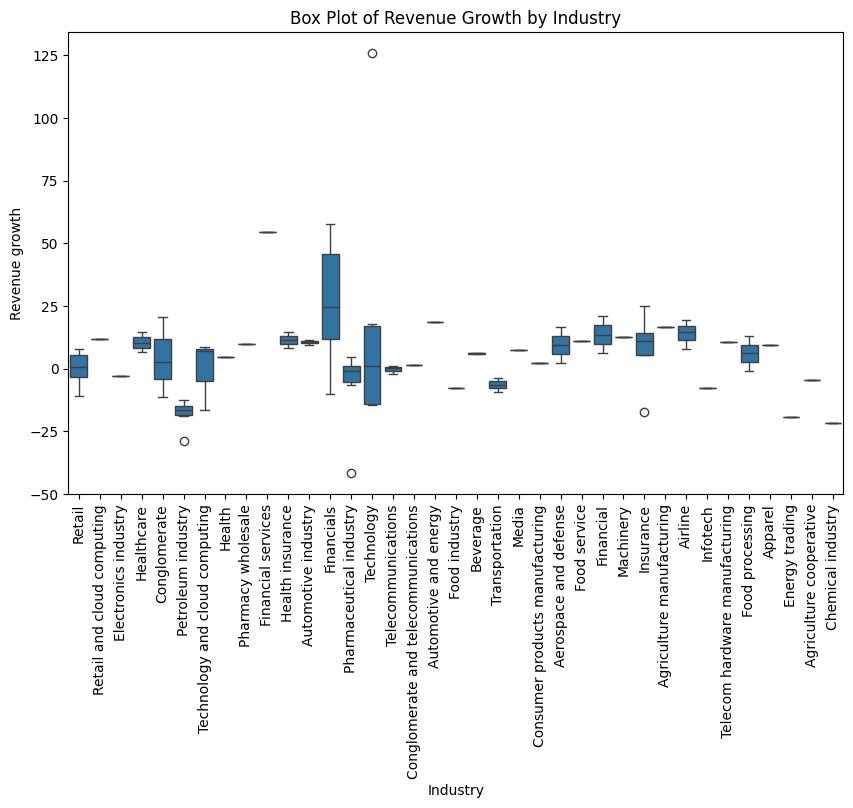

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Revenue growth', data=df)
plt.title('Box Plot of Revenue Growth by Industry')
plt.xticks(rotation=90)
plt.show()


# 6. scatter plot using Plotly Express - showing Revenue vs Employees.

In [22]:
import plotly.express as px

# Plotly Scatter Plot for Revenue vs Employees
fig = px.scatter(top10, x='Revenue (USD millions)', y='Employees', text='Name', title='Revenue vs Employees of Top Companies')
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers+text'))
fig.show()


# 7.Bubble Chart – Revenue vs Employees with Bubble Size by Growth (Plotly)

In [23]:
df['Revenue growth (abs)'] = df['Revenue growth'].abs()

fig = px.scatter(
    df,
    x='Revenue (USD millions)',
    y='Employees',
    size='Revenue growth (abs)',
    color='Industry',
    hover_name='Name',
    title='Revenue vs Employees (Bubble size = Absolute Growth Rate)'
)
fig.show()


# 8. Heatmap – Correlation Matrix (Seaborn)
A Heatmap – Correlation Matrix using Seaborn is a visualization that shows the relationships between multiple variables in a dataset

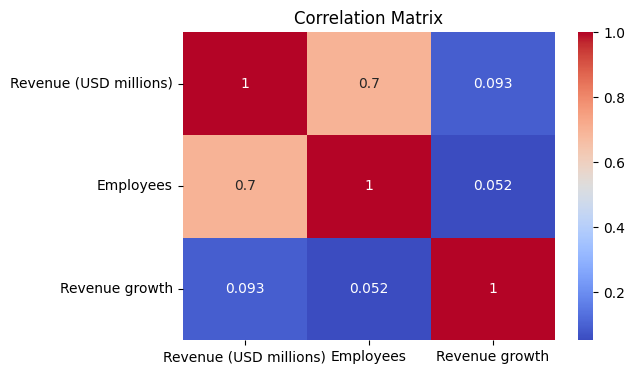

In [24]:
# Convert to string first, then remove commas/percent signs, and convert to float
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(str).str.replace(',', '').astype(float)
df['Employees'] = df['Employees'].astype(str).str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].astype(str).str.replace('%', '').astype(float)

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Revenue (USD millions)', 'Employees', 'Revenue growth']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 9. Treemap – Revenue by Company and Industry (Plotly)

In [25]:
# Create treemap
fig = px.treemap(
    top10,
    path=['Industry', 'Name'],
    values='Revenue (USD millions)',
    title='Treemap: Revenue by Company and Industry'
)
fig.show()


GitHub doesn’t support rendering interactive Plotly charts directly from .py files 
 or notebooks unless you handle the output properly.

In [27]:
#  If you want to keep it interactive and share it via GitHub: You can export the chart to an HTML file:

fig.write_html("treemap.html")